In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000860519"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000860519
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,SAVANNAH BANCORP INC
Ticker,SAVB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,14.0,1.228071e+01,1.200567e+00,9.96,1.159500e+01,12.55,1.316750e+01,13.95
interest income,26.0,1.282558e+07,1.889304e+06,9178000.00,1.151425e+07,12651500.00,1.425450e+07,16179000.00
net income,29.0,1.109138e+06,1.437384e+06,-2034000.00,1.260000e+05,1638000.00,2.381000e+06,2721000.00
net interest income,28.0,8.112000e+06,6.427030e+05,6141000.00,8.032750e+06,8255500.00,8.396750e+06,9035000.00
provision for loan losses,28.0,2.328393e+06,2.079683e+06,305000.00,4.500000e+05,1887500.00,3.600000e+06,6725000.00


# Plots

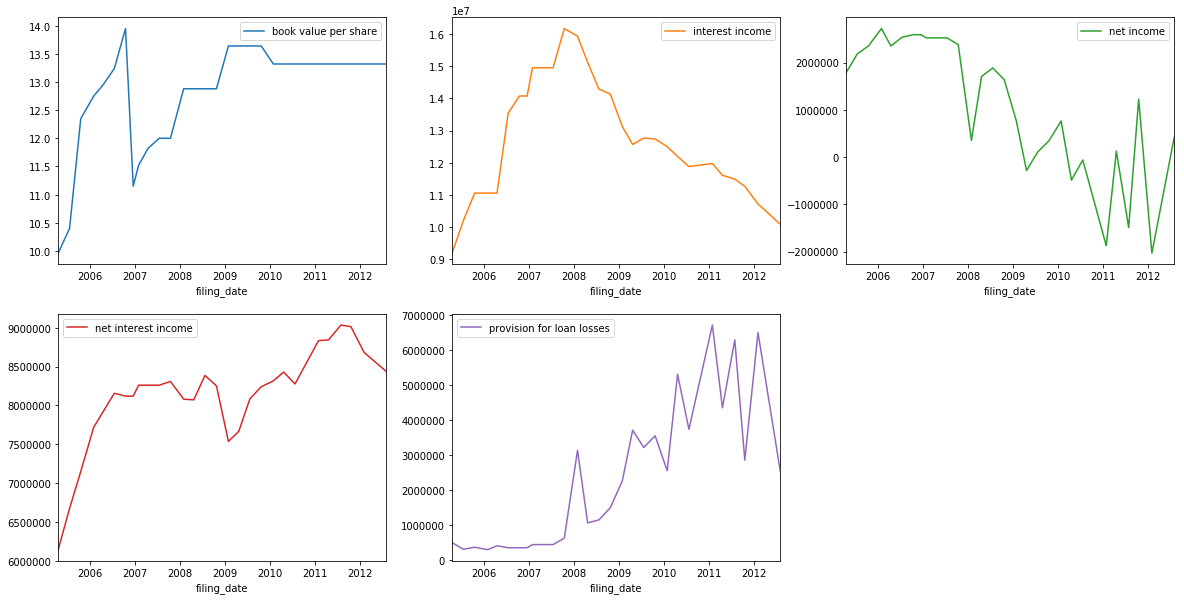

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000860519 book value per share                             2007Q3    missing   
           book value per share        2008Q1 to 2008Q3: 3 periods    missing   
           book value per share        2009Q1 to 2009Q3: 3 periods    missing   
           book value per share       2010Q1 to 2012Q2: 10 periods    missing   
           interest income             2005Q4 to 2006Q1: 2 periods    missing   
           interest income             2007Q1 to 2007Q2: 2 periods    missing   
           interest income                                  2010Q3    missing   
           interest income                                  2012Q1    missing   
           net income                  2007Q1 to 2007Q2: 2 periods    missing   
           net income                                       2007Q4  duplicate   
           net income                                       2010Q3    missing   
           net income                                       2012Q1    missing   
           net interest income         2007Q1 to 2007Q2: 2 periods    missing   
           net interest income                              2010Q3    missing   
           net interest income                              2012Q1    missing   
           provision for loan losses   2007Q1 to 2007Q2: 2 periods    missing   
           provision for loan losses                        2007Q4  duplicate   
           provision for loan losses                        2010Q3    missing   
           provision for loan losses                        2012Q1    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000860519 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()